# Linear Regression

## Dependencies

Ensue that the required libraries have been installed locally as per the README.md file included in the this project.

Run the following cell then import the required dependencies for this notebook.

In [1]:
# Import Libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations
import ipywidgets as widgets  # For interactive widgets in Jupyter notebooks
from IPython.display import display, clear_output  # For displaying and clearing output in Jupyter notebooks
from sklearn.linear_model import LinearRegression  # For linear regression models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, explained_variance_score  # For model evaluation metrics
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling

## Load Dataset

In [2]:
#Load Processed Data Sets

# Annual Gendered Data for 6 Pollutants and 12 Health Outcomes
df_annual_gender = pd.read_csv('../datasets/_integrated-data/processed-annual-gendered.csv')

# Monthly Gendered Data for 6 Pollutants and 2 Health Outcomes
df_monthly_gender = pd.read_csv('../datasets/_integrated-data/processed-monthly-gendered.csv')

# Annual Genderless Data for 6 Pollutants and 8 Health Outcomes
df_annual_genderless = pd.read_csv('../datasets/_integrated-data/processed-annual-genderless.csv')

# Monthly Genderless Data for 6 Pollutants and 1 Health Outcome
df_monthly_genderless = pd.read_csv('../datasets/_integrated-data/processed-monthly-genderless.csv')

## Additional Set Up

In [3]:
# Define the model
model = LinearRegression()

# Drop the first two columns of the datasets (they are not required for this analysis)
df_annual_gender = df_annual_gender.drop(df_annual_gender.columns[:2], axis=1)
df_monthly_gender = df_monthly_gender.drop(df_monthly_gender.columns[:2], axis=1)
df_annual_genderless = df_annual_genderless.drop(df_annual_genderless.columns[:2], axis=1)
df_monthly_genderless = df_monthly_genderless.drop(df_monthly_genderless.columns[:2], axis=1)

### Scale data in both datasets
scaler = StandardScaler()

# Scale the annual gendered dataset
numerical_cols_annual = df_annual_gender.select_dtypes(include=['number']).columns
df_annual_gender[numerical_cols_annual] = scaler.fit_transform(df_annual_gender[numerical_cols_annual])

# Scale the monthly gendered dataset
numerical_cols_monthly = df_monthly_gender.select_dtypes(include=['number']).columns
df_monthly_gender[numerical_cols_monthly] = scaler.fit_transform(df_monthly_gender[numerical_cols_monthly])

# Scale the annual genderless dataset
numerical_cols_annual = df_annual_genderless.select_dtypes(include=['number']).columns
df_annual_genderless[numerical_cols_annual] = scaler.fit_transform(df_annual_genderless[numerical_cols_annual])

# Scale the monthly genderless dataset
numerical_cols_monthly = df_monthly_genderless.select_dtypes(include=['number']).columns
df_monthly_genderless[numerical_cols_monthly] = scaler.fit_transform(df_monthly_genderless[numerical_cols_monthly])

## All Features

Here you can select a label (Health Data) from one of the four datasets. 

The resulting output is a Linear Regression Model charting predictions vs actual values, using all Air Quality data as the features.

The graph is accompanied by a series of Evaluation Metrics


In [4]:
# Create a dropdown widget for selecting the dataset
dataset_dropdown = widgets.Dropdown(
    options=['df_annual_gender', 'df_monthly_gender', 'df_annual_genderless', 'df_monthly_genderless'],
    description='Dataset:',
    disabled=False,
)

# Create a dropdown widget for selecting the dependent variable
dependent_var_dropdown = widgets.Dropdown(
    description='Label:',  # Label for the dropdown
    disabled=False,  # Dropdown is enabled
)

# Function to update the dependent variable dropdown based on the selected dataset
def update_dependent_var_options(change):
    dataset_name = dataset_dropdown.value  # Get the selected dataset
    df = globals()[dataset_name]  # Get the dataframe from the global scope using the dataset name
    dependent_var_dropdown.options = df.columns[6:]  # Update the options for the dependent variable dropdown

# Function to update the plot based on the selected dataset and dependent variable
def update_plot(change):
    dataset_name = dataset_dropdown.value  # Get the selected dataset
    dep_var = dependent_var_dropdown.value  # Get the selected dependent variable
    df = globals()[dataset_name]  # Get the dataframe from the global scope using the dataset name
    
    plt.figure(figsize=(10, 6))  # Create a new figure for the plot
    
    # Define the independent and dependent variables
    X = df[independent_vars].values
    y = df[dep_var].values
    
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=88)
    
    # Fit the model on the training data
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)  # Predict the dependent variable on the test data
    
    # Calculate various evaluation metrics
    r2 = r2_score(y_test, y_pred)  # R² score
    mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
    mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
    rmse = np.sqrt(mse)  # Root Mean Squared Error
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Mean Absolute Percentage Error
    evs = explained_variance_score(y_test, y_pred)  # Explained Variance Score

    # Determine the color of the best fit line based on R² score
    if r2 <= 0:
        line_color = 'red'
    elif 0 < r2 <= 0.3:
        line_color = 'purple'
    elif 0.3 < r2 <= 0.5:
        line_color = 'blue'
    else:
        line_color = 'green'
        
    # Plot the actual vs predicted values
    plt.scatter(y_test, y_pred, color='grey', label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=line_color, lw=2)
    plt.xlabel('Actual')  # Label for x-axis
    plt.ylabel('Predicted')  # Label for y-axis
    plt.title(f'Linear Regression: {dep_var} ({dataset_name})')  # Title of the plot
    plt.legend()  # Show legend
    plt.grid(True)  # Show grid
    
    # Display evaluation metrics next to the plot with full names
    metrics_text = (f'R²={r2:.2f}\n'
                    f'Mean Squared Error={mse:.2f}\n'
                    f'Mean Absolute Error={mae:.2f}\n'
                    f'Root Mean Squared Error={rmse:.2f}\n'
                    f'Mean Absolute Percentage Error={mape:.2f}%\n'
                    f'Explained Variance Score={evs:.2f}')
    plt.text(1.05, 0.5, metrics_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='center')
    
    clear_output(wait=True)  # Clear the previous output
    display(dataset_dropdown, dependent_var_dropdown)  # Ensure the widgets continue to display
    plt.show()  # Display the plot

# Link the dropdown widgets to the update functions
dataset_dropdown.observe(update_dependent_var_options, names='value')
dependent_var_dropdown.observe(update_plot, names='value')

# Initial setup
update_dependent_var_options({'new': dataset_dropdown.value})  # Trigger the initial setup for dependent variable options
update_plot({'new': dependent_var_dropdown.value})  # Trigger the initial plot with the default dropdown value

NameError: name 'independent_vars' is not defined

<Figure size 1000x600 with 0 Axes>

## Single Features

Here you can select a label (Health Data) from one of the four datasets. 

The resulting subplot contains six Linear Regression Model charting predictions vs actual values, using a different Air Quality Metric for each graph.

Each graph is accompanied by a series of Evaluation Metrics

Dropdown(description='Dataset:', options=('df_annual_gender', 'df_monthly_gender', 'df_annual_genderless', 'df…

Dropdown(description='Label:', options=('asthma edp [f]', 'asthma edp [m]', 'asthma hospitalisations [f]', 'as…

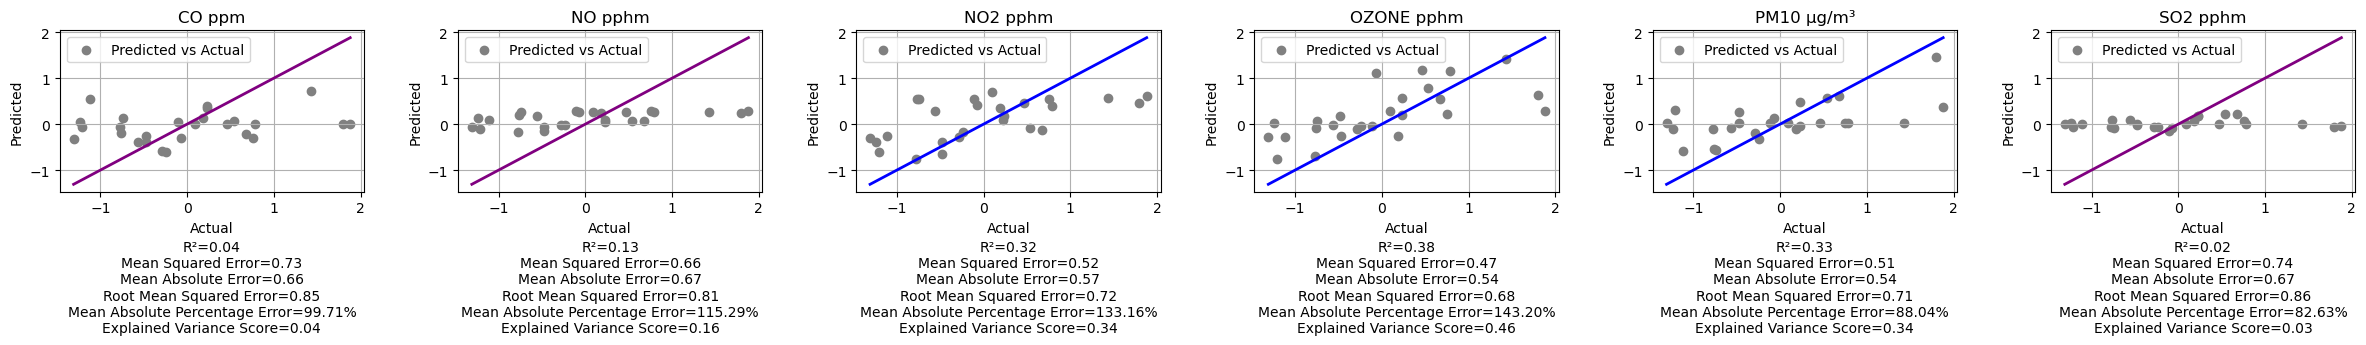

In [133]:
# Create a dropdown widget for selecting the dataset
_dataset_dropdown = widgets.Dropdown(
    options=['df_annual_gender', 'df_monthly_gender', 'df_annual_genderless', 'df_monthly_genderless'],
    description='Dataset:',
    disabled=False,
)

# Create a dropdown widget for selecting the dependent variable
_dependent_var_dropdown = widgets.Dropdown(
    description='Label:',  # Label for the dropdown
    disabled=False,  # Dropdown is enabled
)

# Function to update the dependent variable dropdown based on the selected dataset
def _update_dependent_var_options(change):
    _dataset_name = _dataset_dropdown.value  # Get the selected dataset
    _df = globals()[_dataset_name]  # Get the DataFrame from the global scope using the dataset name
    _dependent_var_dropdown.options = _df.columns[6:]  # Update the options for the dependent variable dropdown

# Function to update the plot based on the selected dataset and dependent variable
def _update_plot(change):
    _dataset_name = _dataset_dropdown.value  # Get the selected dataset
    _dep_var = _dependent_var_dropdown.value  # Get the selected dependent variable
    _df = globals()[_dataset_name]  # Get the DataFrame from the global scope using the dataset name
    
    # Create subplots
    _fig, _axes = plt.subplots(nrows=1, ncols=6, figsize=(24, 4))
    
    # Loop through the first 6 independent variables to create individual plots
    for _i, _indep_var in enumerate(_df.columns[:6]):
        _X = _df[[_indep_var]].values  # Independent variable
        _y = _df[_dep_var].values  # Dependent variable
        
        # Split the data into training and testing sets
        _x_train, _x_test, _y_train, _y_test = train_test_split(_X, _y, test_size=0.2, random_state=88)
        
        # Fit the model on the training data
        model.fit(_x_train, _y_train)
        _y_pred = model.predict(_x_test)  # Predict the dependent variable on the test data
        
        # Calculate various evaluation metrics
        _r2 = r2_score(_y_test, _y_pred)  # R² score
        _mse = mean_squared_error(_y_test, _y_pred)  # Mean Squared Error
        _mae = mean_absolute_error(_y_test, _y_pred)  # Mean Absolute Error
        _rmse = np.sqrt(_mse)  # Root Mean Squared Error
        _mape = np.mean(np.abs((_y_test - _y_pred) / _y_test)) * 100  # Mean Absolute Percentage Error
        _evs = explained_variance_score(_y_test, _y_pred)  # Explained Variance Score
        
        # Determine the color of the best fit line based on R² score
        if _r2 <= 0:
            _line_color = 'red'
        elif 0 < _r2 <= 0.3:
            _line_color = 'purple'
        elif 0.3 < _r2 <= 0.5:
            _line_color = 'blue'
        else:
            _line_color = 'green'

        # Plot the actual vs predicted values
        _axes[_i].scatter(_y_test, _y_pred, color='grey', label='Predicted vs Actual')
        _axes[_i].plot([_y_test.min(), _y_test.max()], [_y_test.min(), _y_test.max()], color=_line_color, lw=2)
        _axes[_i].set_xlabel('Actual')  # Label for x-axis
        _axes[_i].set_ylabel('Predicted')  # Label for y-axis
        _axes[_i].set_title(f'{_indep_var}')  # Title of the subplot
        _axes[_i].legend()  # Show legend
        _axes[_i].grid(True)  # Show grid
        
        # Display evaluation metrics next to the plot with full names
        _metrics_text = (f'R²={_r2:.2f}\n'
                         f'Mean Squared Error={_mse:.2f}\n'
                         f'Mean Absolute Error={_mae:.2f}\n'
                         f'Root Mean Squared Error={_rmse:.2f}\n'
                         f'Mean Absolute Percentage Error={_mape:.2f}%\n'
                         f'Explained Variance Score={_evs:.2f}')
        _axes[_i].text(0.5, -0.3, _metrics_text, transform=_axes[_i].transAxes, fontsize=10, verticalalignment='top', horizontalalignment='center')
    
    clear_output(wait=True)  # Clear the previous output
    display(_dataset_dropdown, _dependent_var_dropdown)  # Ensure the widgets continue to display
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()  # Display the plot

# Link the dropdown widgets to the update functions
_dataset_dropdown.observe(_update_dependent_var_options, names='value')
_dependent_var_dropdown.observe(_update_plot, names='value')

# Initial setup
_update_dependent_var_options({'new': _dataset_dropdown.value})  # Trigger the initial setup for dependent variable options
_update_plot({'new': _dependent_var_dropdown.value})  # Trigger the initial plot with the default dropdown value
